In [1]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Import city and and ride data csv files.

#City data

city_data = "Resources/city_data.csv"

#Ride data

ride_data = "Resources/ride_data.csv"

In [3]:
#Read city data file with the pandas library.

city_data_df = pd.read_csv(city_data)
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
# Read ride data file with the pandas library.

ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
pyber_data = pd.merge(city_data_df, ride_data_df, on="city", how="left")
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [6]:
#Find the average fare per city.

average_fare = pyber_data.groupby(["city"])["fare"].mean()
average_fare

city
Alvarezhaven            23.928710
Alyssaberg              20.609615
Anitamouth              37.315556
Antoniomouth            23.625000
Aprilchester            21.981579
Arnoldview              25.106452
Campbellport            33.711333
Carrollbury             36.606000
Carrollfort             25.395517
Clarkstad               31.051667
Conwaymouth             34.591818
Davidtown               22.978095
Davistown               21.497200
East Cherylfurt         31.416154
East Douglas            26.169091
East Erin               24.478214
East Jenniferchester    32.599474
East Leslie             33.660909
East Stephen            39.053000
East Troybury           33.244286
Edwardsbury             26.876667
Erikport                30.043750
Eriktown                25.478947
Floresberg              32.310000
Fosterside              23.034583
Hernandezshire          32.002222
Horneland               21.482500
Jacksonfort             32.006667
Jacobfort               24.779355
Jasonfort

In [7]:
#TSet the limit for the x axis. The maximum x value for the chart will be 50.
x_limit = 50

#Create x axis.
x_axis = np.arange(0,50,1)

# Set the limit for the y axis. The maximum y value for the chart will be 50.
y_limit = 50

#Create the y axis.

average_fare = np.arange(0,50,1)

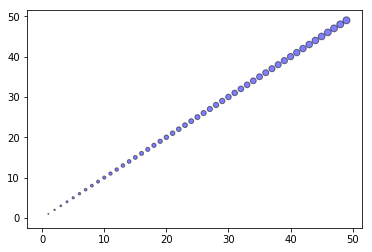

In [8]:
#Create a scatter plot for average fare per city.

plt.scatter(x_axis, average_fare, marker="o", facecolors="blue", edgecolors="black", s=x_axis, alpha=0.5)
plt.show()

In [9]:
#Find the total rides per city.

total_rides = pyber_data.groupby(["city"])["ride_id"].count()
total_rides

city
Alvarezhaven            31
Alyssaberg              26
Anitamouth               9
Antoniomouth            22
Aprilchester            19
Arnoldview              31
Campbellport            15
Carrollbury             10
Carrollfort             29
Clarkstad               12
Conwaymouth             11
Davidtown               21
Davistown               25
East Cherylfurt         13
East Douglas            22
East Erin               28
East Jenniferchester    19
East Leslie             11
East Stephen            10
East Troybury            7
Edwardsbury             27
Erikport                 8
Eriktown                19
Floresberg              10
Fosterside              24
Hernandezshire           9
Horneland                4
Jacksonfort              6
Jacobfort               31
Jasonfort               12
                        ..
South Roy               22
South Shannonborough    15
Spencertown             26
Stevensport              5
Stewartview             30
Swansonbury            

In [10]:
#Create a scatter plot for total rides per city.

#Set the limit for the x axis. The maximum x value for the chart will be 50.
x_lim = 50

#Create the x axis.
x_axis = np.arange(0,50,1)

#Set the limit for the y axis. the maximum y value for the chart will be 50.
y_lim = 50

#Create the y axis.
total_rides = np.arange(0,50,1)

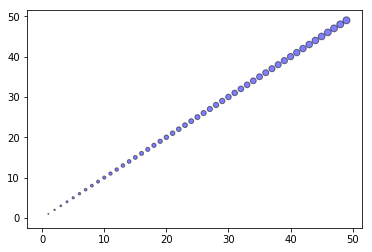

In [11]:
#Create a scatter plot for total rides per city.

plt.scatter(x_axis, total_rides, marker="o", facecolor="blue", edgecolor="black", s=x_axis, alpha=0.5)
plt.show()

In [12]:
#Find the total number of drivers per city.

total_drivers = pyber_data.groupby(["city"])["driver_count"].count()
total_drivers

city
Alvarezhaven            31
Alyssaberg              26
Anitamouth               9
Antoniomouth            22
Aprilchester            19
Arnoldview              31
Campbellport            15
Carrollbury             10
Carrollfort             29
Clarkstad               12
Conwaymouth             11
Davidtown               21
Davistown               25
East Cherylfurt         13
East Douglas            22
East Erin               28
East Jenniferchester    19
East Leslie             11
East Stephen            10
East Troybury            7
Edwardsbury             27
Erikport                 8
Eriktown                19
Floresberg              10
Fosterside              24
Hernandezshire           9
Horneland                4
Jacksonfort              6
Jacobfort               31
Jasonfort               12
                        ..
South Roy               22
South Shannonborough    15
Spencertown             26
Stevensport              5
Stewartview             30
Swansonbury            

In [13]:
#Create a scatter plot for total drivers per city.

#Set the limit for the limit for the x axis. The maximum value for the x axis will be 50.
x_lim = 50

#Create the x axis.
x_axis = np.arange(0,50,1)

#Set the limit for the y axis. The maximum value for the y axis will be 50.
y_lim = 50

#Create the y axis.
total_drivers = np.arange(0,50,1)

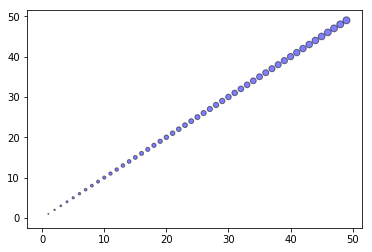

In [14]:
#Create a scatter plot for total drivers per city.

plt.scatter(x_axis, total_drivers, marker="o", facecolor="blue", edgecolor="black", s=x_axis, alpha=0.5)
plt.show()

In [15]:
#Count the number of each city type: urban, suburban, rural.

city_type = pyber_data.groupby(["type"])["type"].count()
city_type

type
Rural        125
Suburban     657
Urban       1625
Name: type, dtype: int64

In [16]:
# Create a scatter plot for city type.

#Set the x limit. The maximum x value will be 2000.
x_lim = 2000

#Create the x axis.
x_axis = np.arange(0,2000,50)

#Set the y limit. The maximum value for the y axis is 2000.
y_lim = 2000

#Create the y axis.
city_type = np.arange(0,2000,50)

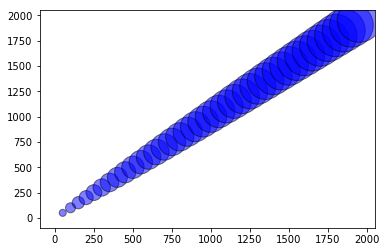

In [17]:
# Create a scatter plot for city type.

plt.scatter(x_axis, city_type, marker="o", facecolor="blue", edgecolor="black", s=x_axis, alpha=0.5)
plt.show()